In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import linear_model as lm

# Ground Cricket Chirps : 

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
x = df['Ground Temperature'].values.reshape(-1,1)
y = df['Chirps/Second'].values.reshape(-1,1)

### Find the linear regression equation for this data.

In [3]:
linreg = lm.LinearRegression() # creates linear regression object
linreg.fit(x,y)

print 'y= {}x + {}'.format(linreg.coef_,linreg.intercept_)

y= [[ 0.20299973]]x + [ 0.45931465]


### Chart  the original data and the equation on the chart.

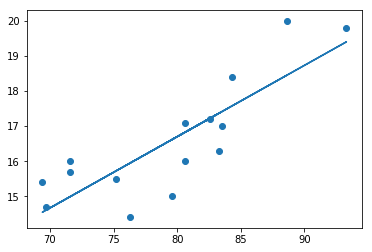

In [4]:
#xline = x
#yline = (linreg.coef_)*x + linreg.intercept_
y_predict = linreg.predict(x)
plt.scatter(x, y)
plt.plot(x, y_predict)
plt.show()

### Find the equation's  R^2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [5]:
print('R^2 value: {}'.format(linreg.score(x,y)))

R^2 value: 0.692294652915


### Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [6]:
# plug t=95 into lin reg equation: y = (linreg.coef_)*x + linreg.intercept_
x = 95
estimated_rate = (linreg.coef_)*x + linreg.intercept_

print 'Estimated Chirps/Second for 95 degrees: {}'.format(estimated_rate)

Estimated Chirps/Second for 95 degrees: [[ 19.74428913]]


### Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [7]:
# plug c/s=18 into inverse of lin reg equation

x = 18
estimated_temp= (x - linreg.intercept_)/(linreg.coef_)
print 'Estimated Temperature for 18 Chirps/Second: {}'.format(estimated_temp)

Estimated Temperature for 18 Chirps/Second: [[ 86.40743135]]


# Brain vs. Body Weight

In [21]:
df = pd.read_fwf("brain_body.txt")
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


### Find the linear regression equation for this data for brain weight to body weight.

In [22]:
x = df['Brain'].values.reshape(-1,1)
y = df['Body'].values.reshape(-1,1)

lr = lm.LinearRegression()
lr.fit(x,y)

print 'y= {}x + {}'.format(lr.coef_,lr.intercept_)

y= [[ 0.96649637]]x + [ 91.00439621]


### Chart the original data and the equation on the chart.

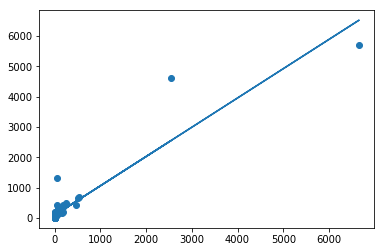

In [23]:
y_predict = lr.predict(x)
plt.scatter(x, y)
plt.plot(x, y_predict)
plt.show()

### Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [24]:
print('R^2 value: {}'.format(lr.score(x,y)))

R^2 value: 0.872662084304


# Salary Discrimination

In [25]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Find the linear regression equation for this data using columns 1-5 to column 6.

In [33]:
xdict = {}
for column in df:
    if column == 'Salary':
        y = df['Salary'].values.reshape(-1,1)
    else:
        xdict[column] = df[column].values.reshape(-1,1)

        
for k, v in xdict.items():
    lr = lm.LinearRegression()
    lr.fit(v,y)
    print '{}:  y= {}x + {}'.format(k,lr.coef_,lr.intercept_)
    

YSdeg:  y= [[ 390.64512637]]x + [ 17502.25738659]
Year:  y= [[ 752.79775742]]x + [ 18166.14754547]
Degree:  y= [[-858.86928105]]x + [ 24359.22222222]
Rank:  y= [[ 5952.77890467]]x + [ 11663.14300203]
Sex:  y= [[-3339.64661654]]x + [ 24696.78947368]


### Find the selection of columns with the best $R^2$ score.

In [35]:
for k, v in xdict.items():
    lr = lm.LinearRegression()
    lr.fit(v,y)
    print('{} : R^2 value: {}'.format(k,lr.score(v,y)))

YSdeg : R^2 value: 0.455428134584
Year : R^2 value: 0.490937026769
Degree : R^2 value: 0.00486168098475
Rank : R^2 value: 0.752536053927
Sex : R^2 value: 0.0638989258329


### Report whether sex is a factor in salary.

With a $R^2$ score of only 0.06, sex does not seem to hold a strong correlation in this data set

# ADDITIONAL QUESTIONS

### What is the geometric interpretation of why ridge and lasso are different? Why does this matter? What happens to the parameters in each case.


Regularization is all about correcting overfitted models. Over fitted models may provide a high degree of accuracy for the sample/training set, however, they produce overly complicated functions and frequently fail to predict future behavior in a realistic fasion.

Both RIdge and Lasso regularization add a 'penalty term' to the fitted function in order to minimize the contribution of higher order terms. Kasso  uses an absolut value of the error whereas ridge uses the square of the error. Thus, Ridge tends to negate the more extreme coefficients than lasso. 

### Implement Linear Regression (ols; any way you like). Fit random data, and plot your model’s best fit line and dataset.


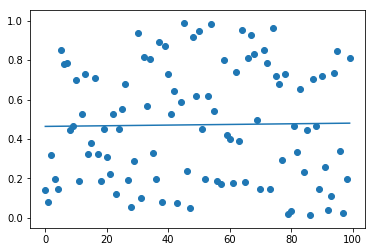

In [40]:
x = np.arange(0,100).reshape(-1,1)
y = np.random.rand(100,1).reshape(-1,1)

linreg = lm.LinearRegression() # creates linear regression object
linreg.fit(x,y)

y_predict = linreg.predict(x)
plt.scatter(x, y)
plt.plot(x, y_predict)
plt.show()

### Would you ever use gradient descent to solve this problem?